# Curso de análise de dados Alura Quarentena Dados - Python, Pandas e Colab Google - AULA 1



In [0]:
import pandas as pd

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/satoota/alura-base-filmes/master/ml-latest-small/movies.csv")
#Filmes é um dataframe
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#Abre a documentação disponivel para o dataframe
?filmes.head

In [4]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/satoota/alura-base-filmes/master/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#Mostra o formato desse dataframe
avaliacoes.shape

(100836, 4)

In [6]:
#Renomeando as colunas do meu dataframe
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
#Aqui eu busco todos os registros com o numero id = 1
avaliacoes.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [8]:
#Analizar o dataframe inteiro
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
#quais os valores exatos das notas
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [10]:
avaliacoes['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
avaliacoes.query("filmeId == 1").mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [12]:
# Notas medias por filme
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [13]:
#juntar um dataframe e um series com join e outro como parametro
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [14]:
#Ordenar os valores
filmes_com_media.sort_values("nota", ascending=False)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


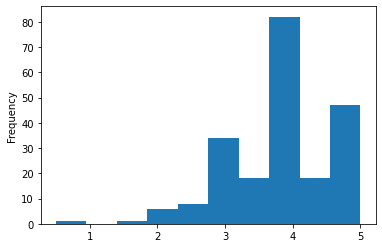

In [15]:
#avaliacoes.query("filmeId in [1,2,102084]")
#avaliacoes.query("filmeId == 1")['nota'].plot()
#Aqui, muitas pessoas avaliaram o filme, deixando uma amostra confiável.
avaliacoes.query("filmeId == 1")['nota'].plot(kind='hist')

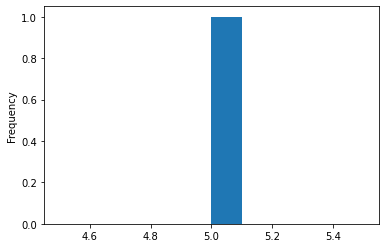

In [16]:
#Aqui, uma pessoa deu nota 5 para esse filme. 
avaliacoes.query("filmeId == 102084")['nota'].plot(kind='hist')

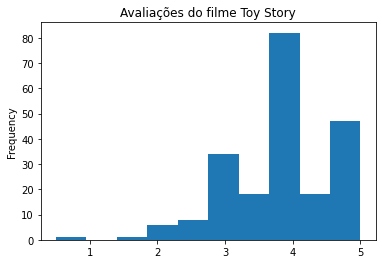

In [17]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")['nota'].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

# Curso de análise de dados Alura Quarentena Dados - Médias, medianas e visualização de dados - AULA 2

In [18]:
# Os generos dos filmes sao do tipo string, podemos usar a função str para fazer varias coisas.
# No caso abaixo, ele quebra as strings ate onde tem o | e elabora para mim uma matriz com valores verdadeiros ou falsos para casa genero listado
filmes['generos'].str.get_dummies("|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Por padrão ele usa o eixo vertical para realizar as somas
filmes['generos'].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [20]:
# Quantidade de generos por filme (na mesma linha)
filmes['generos'].str.get_dummies("|").sum(axis=1)

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

In [21]:
# A quantidade de filmes com generos ( exemplo : quantos filmes possuem dois generos = 3218)
filmes['generos'].str.get_dummies("|").sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [22]:
# Ordenar os valores ( uma série de valores)
filmes['generos'].str.get_dummies("|").sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

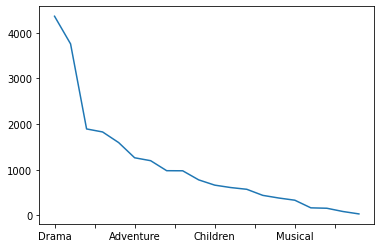

In [23]:
# Nao faz sentido esse tipo de visualização
filmes['generos'].str.get_dummies("|").sum().sort_values(ascending=False).plot()

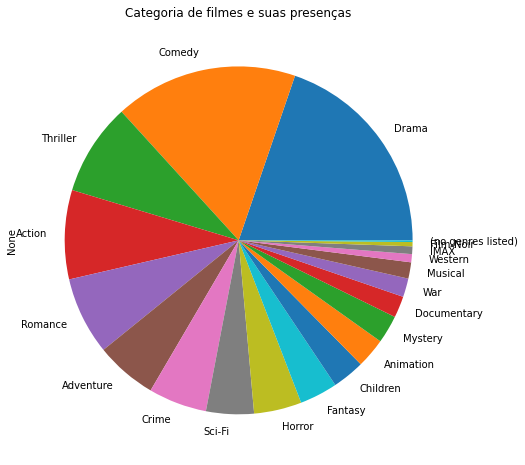

In [24]:
filmes['generos'].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind = 'pie',
                                                                               title='Categoria de filmes e suas presenças',
                                                                               figsize=(8,8))
plt.show()

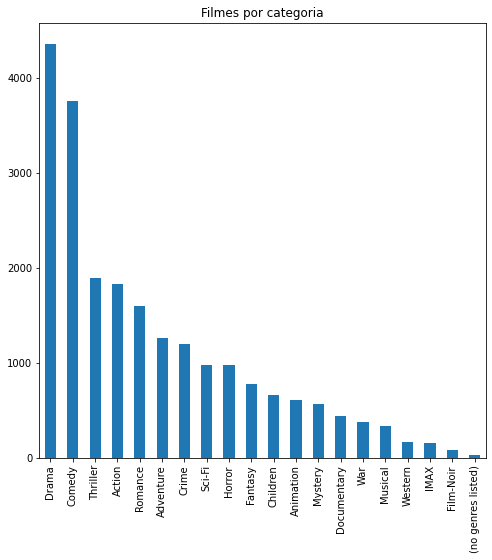

In [25]:
filmes['generos'].str.get_dummies("|").sum().sort_values(ascending=False).plot(kind = 'bar',
                                                                               title='Filmes por categoria',
                                                                               figsize=(8,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


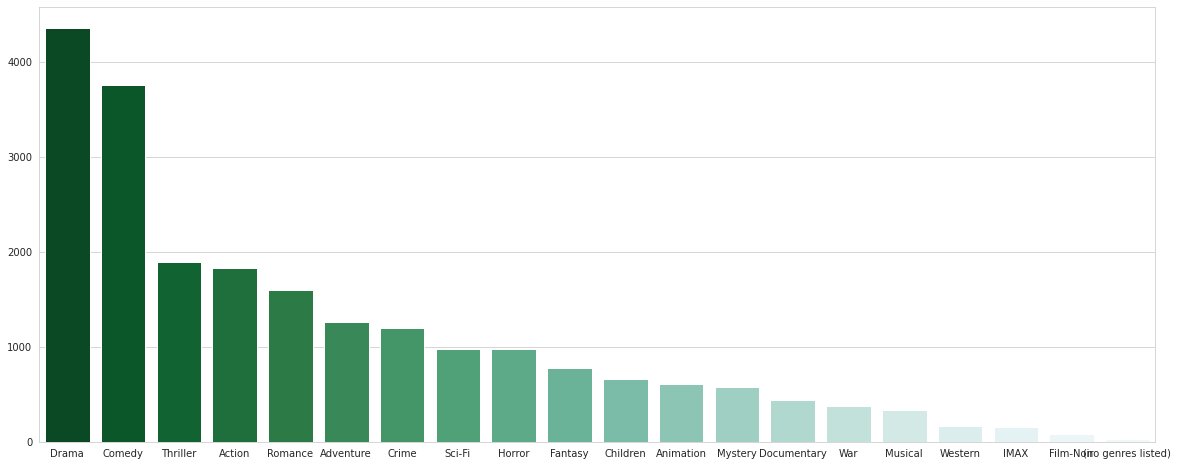

In [26]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes['generos'].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=(sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero + 4))))
plt.show()

In [27]:
# reflexão estatistica. A media as vezes nao é o melhor parametro a se analisar. Por exemplo:
# Analisar o salário médio das pessoas de duas cidades. Cidade A e Cidade B

populacaoA = 1000
salarioA = 1000
mediaA = 1000

populacaoB = 1000
salario_1_pessoa = 1000000
salario_999_pessoas = 1
mediaB = (salario_1_pessoa*1 + salario_999_pessoas*999)/1000
print(mediaB)

1000.999


In [0]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
notas_do_filme_2 = avaliacoes.query("filmeId==2")["nota"]

In [29]:
# Descrição estatistica dessa variável
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [30]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [31]:
# Pego os filmes com nota media de 30 até 50
filmes_com_media.sort_values("nota",ascending=False)[2450:2500]

,filmeId,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
# Aqui, define-se uma função para analisar cada filme por cada genero.
# A função boxplot diz como esta concentrada as notas por cada filme, de acordo com o describe
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

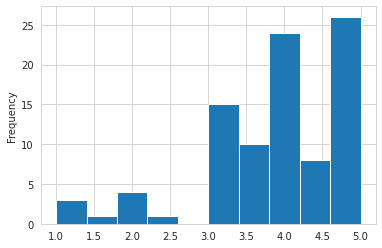

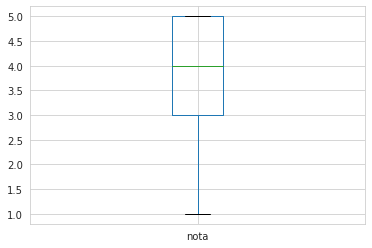

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [33]:
plot_filme(919)

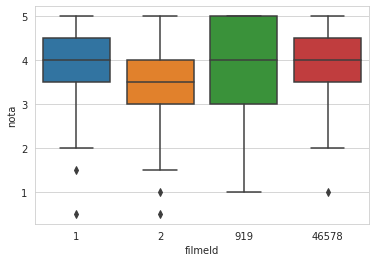

In [34]:
# Aqui comparando diferentes box plots por filmes
sns.boxplot(data= avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

# Curso de análise de dados Alura Quarentena Dados - Correlações e exploração dos dados - AULA 3

In [35]:
imdb = pd.read_csv("https://raw.githubusercontent.com/satoota/alura-base-filmes/master/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [36]:
# Visualizar tipos de cores na coluna 'color'
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [37]:
# Desconsiderando valores do tipo 'nan'
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [38]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [39]:
# Quantos filmes cada diretor fez
imdb['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
Mikel Rueda          1
John Blanchard       1
William Wyler        1
Wolfgang Becker      1
Ritesh Batra         1
Name: director_name, Length: 2398, dtype: int64

In [40]:
# estatistica descritiva do numero de criticas
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

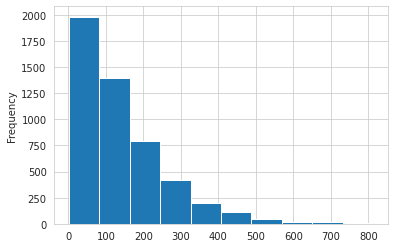

In [41]:
# plotagem do numero de criticas
imdb['num_critic_for_reviews'].plot(kind='hist')
plt.show()

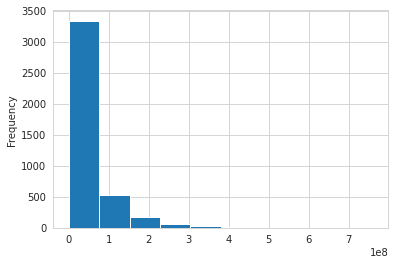

In [42]:
# plotagem do faturamento em potencia de 10
imdb['gross'].plot(kind='hist')
plt.show()

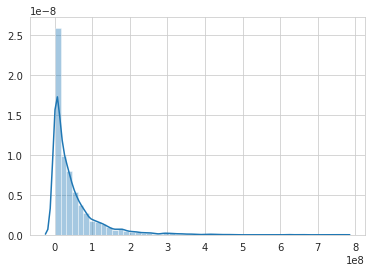

In [43]:
import seaborn as sns

sns.distplot([imdb['gross']])

In [44]:
# ordem dos 5 primeiros filmes que mais faturaram em bilheteria
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [45]:
# pegar 5 filmes aleatorios
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4545,Color,William Brent Bell,225.0,83.0,19.0,128.0,Claudiu Trandafir,403.0,53245055.0,Horror,Fernanda Andrade,The Devil Inside,30570,988,Brian Johnson,0.0,critically bashed|demonic possession|exorcism|...,http://www.imdb.com/title/tt1560985/?ref_=fn_t...,290.0,English,USA,R,1000000.0,2012.0,169.0,4.2,1.85,12000
2332,Color,Matthew Diamond,28.0,88.0,12.0,231.0,Garrett Clayton,979.0,1064277.0,Adventure|Family|Fantasy|Musical,Chazz Palminteri,The Oogieloves in the Big Balloon Adventure,14015,1978,Toni Braxton,0.0,balloon|birthday|box office flop|critically ba...,http://www.imdb.com/title/tt1520498/?ref_=fn_t...,83.0,English,USA,G,20000000.0,2012.0,532.0,6.7,NaN,831
4648,Color,Charles Herman-Wurmfeld,73.0,88.0,0.0,102.0,Rian Bishop,465.0,442638.0,Comedy|Romance|Sport,John Enos III,The Hammer,5489,897,Adam Carolla,1.0,birthday|boxing|coach|gym|olympics,http://www.imdb.com/title/tt0814130/?ref_=fn_t...,23.0,English,USA,R,850000.0,2007.0,140.0,7.3,NaN,337
2188,Color,Jun Falkenstein,89.0,77.0,25.0,16.0,John Fiedler,304.0,45542421.0,Animation|Comedy|Drama|Family|Musical,Kath Soucie,The Tigger Movie,13319,575,Ken Sansom,0.0,cartoon tiger|coming of age|tiger|tigger|title...,http://www.imdb.com/title/tt0220099/?ref_=fn_t...,53.0,English,USA,G,30000000.0,2000.0,253.0,6.3,1.78,347
1680,Color,Nicholas Stoller,232.0,131.0,89.0,372.0,Jacki Weaver,2000.0,28644770.0,Comedy|Romance,Alison Brie,The Five-Year Engagement,78974,3479,David Paymer,2.0,kissing while having sex|kitchen|reference to ...,http://www.imdb.com/title/tt1195478/?ref_=fn_t...,141.0,English,USA,R,30000000.0,2012.0,401.0,6.2,1.85,11000
1062,Color,Paul Bolger,93.0,75.0,0.0,677.0,George Carlin,4000.0,15519841.0,Adventure|Animation|Comedy|Family|Fantasy,Sarah Michelle Gellar,Happily N'Ever After,8693,6863,Rob Paulsen,3.0,apostrophe in title|cinderella|first of series...,http://www.imdb.com/title/tt0308353/?ref_=fn_t...,71.0,English,USA,PG,47000000.0,2006.0,769.0,4.5,1.85,261
2049,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316020,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0
3065,Color,William A. Graham,14.0,102.0,8.0,40.0,Wayne Pygram,14000.0,2807854.0,Adventure|Drama|Romance,Milla Jovovich,Return to the Blue Lagoon,14129,14281,Lisa Pelikan,1.0,baby|desert island|island|sequel|teenage girl,http://www.imdb.com/title/tt0102782/?ref_=fn_t...,39.0,English,USA,PG-13,11000000.0,1991.0,163.0,5.1,1.85,967
148,Color,Eric Darnell,211.0,93.0,35.0,436.0,Martin Short,851.0,216366733.0,Adventure|Animation|Comedy|Family,Jada Pinkett Smith,Madagascar 3: Europe's Most Wanted,119213,2444,Cedric the Entertainer,0.0,animal|circus|island name in title|lemur|penguin,http://www.imdb.com/title/tt1277953/?ref_=fn_t...,154.0,English,USA,PG,145000000.0,2012.0,770.0,6.9,1.85,17000
1723,Color,Li Zhang,63.0,121.0,0.0,187.0,Joan Chen,974.0,127437.0,Action|Adventure|Drama|History|War,Bingbing Li,1911,4670,1887,Jaycee Chan,0.0,china|disarming someone|qing dynasty|stabbed w...,http://www.imdb.com/title/tt1772230/?ref_=fn_t...,27.0,Mandarin,China,R,18000000.0,2011.0,643.0,6.0,2.35,0


In [46]:
color_and_BW = imdb.query("color in [ 'Color', ' Black and White']")
len(color_and_BW)

5024

In [47]:
color_and_BW['color_0_ou_1'] = (color_and_BW['color']=='Color')*1
color_and_BW.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [48]:
color_and_BW['color_0_ou_1'].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

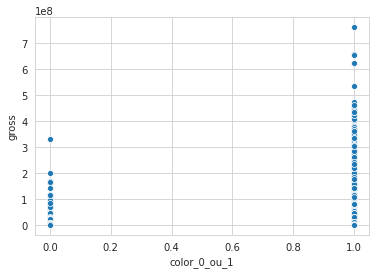

In [49]:
sns.scatterplot(data=color_and_BW, x='color_0_ou_1', y='gross')

In [50]:
# Agrupamento pela cor e a média
color_and_BW.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [51]:
# Nota media por filme preto e branco ou colorido
color_and_BW.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [52]:
# Mediana por filme preto e branco ou colorido
color_and_BW.groupby('color').median()['imdb_score']

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

In [53]:
# Limpando o dataframe que contenham Nan em qualquer uma das colunas budget ou gross
imdb[['budget', 'gross']].dropna()

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
5,263700000.0,73058679.0
...,...,...
5033,7000.0,424760.0
5034,7000.0,70071.0
5035,7000.0,2040920.0
5037,9000.0,4584.0


In [0]:
# Removendo linhas duplicadas
imdb = imdb.drop_duplicates()

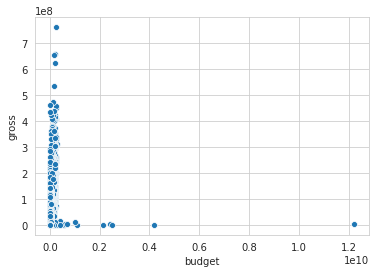

In [55]:
# plotando o grafico de budget e gross 
sns.scatterplot(data=imdb[['budget', 'gross']].dropna(), x='budget', y='gross')

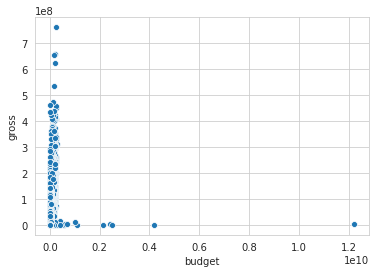

In [56]:
# plotando o grafico de budget e gross com restrições
# Aqui esta zuado a visualização pois existem outliers em moedas de outras nacionalidades, ou seja, que nao estao em dolares
sns.scatterplot(data=imdb[['budget', 'gross']].dropna().query('budget > 0 | gross > 0'), x='budget', y='gross')

In [57]:
imdb.sort_values('budget', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,Color,Tadeo Garcia,NaN,84.0,5.0,12.0,Michael Cortez,21.0,NaN,Drama,Tatiana Suarez-Pico,On the Downlow,156,62,Eric Ambriz,2.0,gang initiation|gunplay|hazing|latino|shakespe...,http://www.imdb.com/title/tt0390323/?ref_=fn_t...,3.0,English,USA,NaN,NaN,2004.0,20.0,6.1,NaN,22
5032,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789.0,NaN,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1.0,corruption|homeless|homeless man|motorcycle|ur...,http://www.imdb.com/title/tt0109266/?ref_=fn_t...,14.0,English,USA,NaN,NaN,1995.0,194.0,6.4,NaN,20
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000


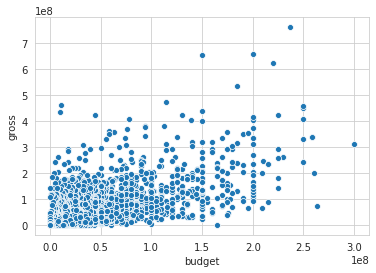

In [59]:
# plotando filmes apenas dos estados unidos, e teoricamente estao na mesma moeda
imdb_usa = imdb.query("country == 'USA'")
sns.scatterplot(data=imdb_usa[['budget', 'gross']].dropna(), x='budget', y='gross')
#imdb['country'].value_counts()

In [60]:
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


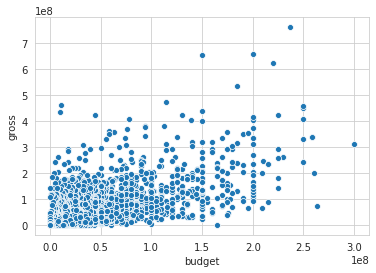

In [61]:
sns.scatterplot(data=imdb_usa[['budget', 'gross']].dropna().query('budget > 0 | gross > 0'), x='budget', y='gross')

In [63]:
# lucro / prejuizo
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
imdb_usa.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


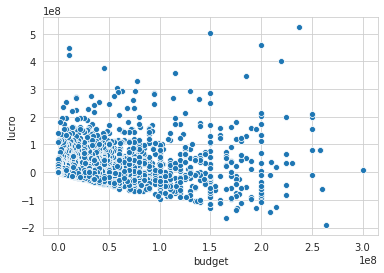

In [66]:
sns.scatterplot(data=imdb_usa[['budget', 'lucro']].dropna().query('budget > 0 | lucro > 0'), x='budget', y='lucro')

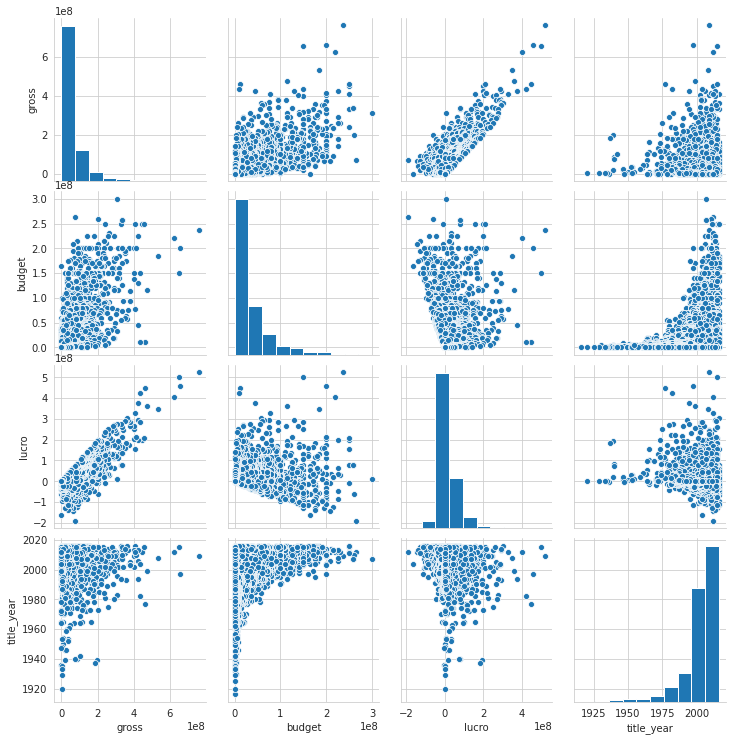

In [69]:
# plotando diversos casos fim de encontrar diferentes relacionamentos
sns.pairplot(data=imdb_usa[['gross', 'budget', 'lucro', 'title_year']])

In [73]:
# Calculo da correlação entre os dados
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

# gross = entrada bruta bugdet = orçamento
# Interpretação : Quando o orçamento (budget) aumenta, teoricamente o lucro tambem aumenta
# O ano nao aparenta ter correlação com a entrada bruta
# numero negativo( quanto maior o ano, menor é o lucro)

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000
